# Análisis Exploratorio del Dataset PolyMNIST

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os



2025-07-29 18:21:20.607755: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-29 18:21:20.616077: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-29 18:21:20.638169: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753834880.672070   19764 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753834880.683073   19764 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753834880.717143   19764 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("agungpambudi/mnist-multiple-dataset-comprehensive-analysis")

#print("Path to dataset files:", path)

In [3]:
# Ruta relativa a la carpeta PolyMNIST
data_path = 'data/mnist-multiple-dataset-comprehensive-analysis/versions/3/PolyMNIST'

# Listar archivos en la carpeta
image_files = sorted([f for f in os.listdir(data_path) if f.endswith('.png') or f.endswith('.jpg')])

# Mostrar algunas imágenes
plt.figure(figsize=(12, 4))
for i, file_name in enumerate(image_files[:5]):
    img_path = os.path.join(data_path, file_name)
    img = Image.open(img_path)
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(f'{file_name}')
plt.tight_layout()
plt.show()

<Figure size 1200x400 with 0 Axes>

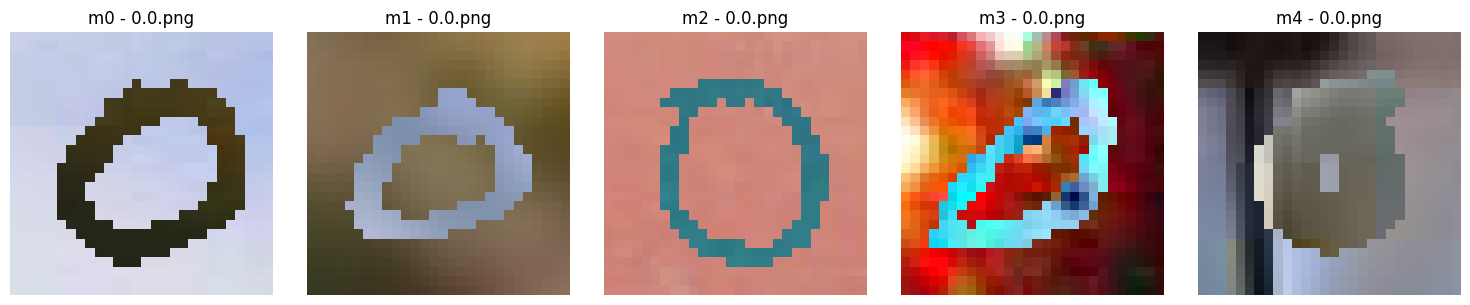

In [4]:

from PIL import Image


base_path = 'data/mnist-multiple-dataset-comprehensive-analysis/versions/3/PolyMNIST/MMNIST/train'
modalities = ['m0', 'm1', 'm2', 'm3', 'm4']

plt.figure(figsize=(15, 3))
for i, mod in enumerate(modalities):
    mod_path = os.path.join(base_path, mod)
    file = sorted(os.listdir(mod_path))[0]  # Primer archivo
    img = Image.open(os.path.join(mod_path, file))
    
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'{mod} - {file}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:

for mod in modalities:
    mod_path = os.path.join(base_path, mod)
    first_file = sorted(os.listdir(mod_path))[0]
    img = Image.open(os.path.join(mod_path, first_file))
    print(f"Modalidad {mod}: {first_file} - Resolución: {img.size}")


Modalidad m0: 0.0.png - Resolución: (28, 28)
Modalidad m1: 0.0.png - Resolución: (28, 28)
Modalidad m2: 0.0.png - Resolución: (28, 28)
Modalidad m3: 0.0.png - Resolución: (28, 28)
Modalidad m4: 0.0.png - Resolución: (28, 28)


In [6]:
# Contar cantidad de imágenes por modalidad
for mod in modalities:
    mod_path = os.path.join(base_path, mod)
    count = len([f for f in os.listdir(mod_path) if f.endswith('.png')])
    print(f"Modalidad {mod}: {count} imágenes")


Modalidad m0: 60000 imágenes
Modalidad m1: 60000 imágenes
Modalidad m2: 60000 imágenes
Modalidad m3: 60000 imágenes
Modalidad m4: 60000 imágenes


In [7]:
from collections import Counter

# Contar etiquetas para una modalidad
mod = 'm0'
mod_path = os.path.join(base_path, mod)
labels = [filename.split('.')[1] for filename in os.listdir(mod_path) if filename.endswith('.png')]
label_counts = Counter(labels)

# Mostrar distribución
print(f"Distribución de clases en modalidad {mod}:")
for label in sorted(label_counts):
    print(f"Clase {label}: {label_counts[label]} imágenes")


Distribución de clases en modalidad m0:
Clase 0: 5923 imágenes
Clase 1: 6742 imágenes
Clase 2: 5958 imágenes
Clase 3: 6131 imágenes
Clase 4: 5842 imágenes
Clase 5: 5421 imágenes
Clase 6: 5918 imágenes
Clase 7: 6265 imágenes
Clase 8: 5851 imágenes
Clase 9: 5949 imágenes


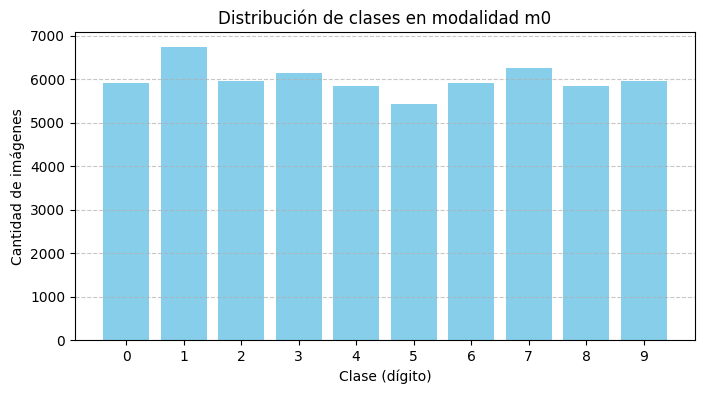

In [8]:

# Convertir counts a listas para graficar
etiquetas = sorted(label_counts.keys())
frecuencias = [label_counts[k] for k in etiquetas]

# Graficar
plt.figure(figsize=(8, 4))
plt.bar(etiquetas, frecuencias, color='skyblue')
plt.title(f'Distribución de clases en modalidad {mod}')
plt.xlabel('Clase (dígito)')
plt.ylabel('Cantidad de imágenes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [10]:
for mod in modalities:
    mod_path = os.path.join(base_path, mod)
    labels = [filename.split('.')[1] for filename in os.listdir(mod_path) if filename.endswith('.png')]
    label_counts = Counter(labels)
    
    print(f"\nDistribución de clases en modalidad {mod}:")
    for label in sorted(label_counts):
        print(f"Clase {label}: {label_counts[label]} imágenes")
    
    # Mostrar modo de imagen
    img_path = os.path.join(mod_path, os.listdir(mod_path)[0])
    img = Image.open(img_path)
    print("Modo de imagen:", img.mode)


Distribución de clases en modalidad m0:
Clase 0: 5923 imágenes
Clase 1: 6742 imágenes
Clase 2: 5958 imágenes
Clase 3: 6131 imágenes
Clase 4: 5842 imágenes
Clase 5: 5421 imágenes
Clase 6: 5918 imágenes
Clase 7: 6265 imágenes
Clase 8: 5851 imágenes
Clase 9: 5949 imágenes
Modo de imagen: RGB

Distribución de clases en modalidad m1:
Clase 0: 5923 imágenes
Clase 1: 6742 imágenes
Clase 2: 5958 imágenes
Clase 3: 6131 imágenes
Clase 4: 5842 imágenes
Clase 5: 5421 imágenes
Clase 6: 5918 imágenes
Clase 7: 6265 imágenes
Clase 8: 5851 imágenes
Clase 9: 5949 imágenes
Modo de imagen: RGB

Distribución de clases en modalidad m2:
Clase 0: 5923 imágenes
Clase 1: 6742 imágenes
Clase 2: 5958 imágenes
Clase 3: 6131 imágenes
Clase 4: 5842 imágenes
Clase 5: 5421 imágenes
Clase 6: 5918 imágenes
Clase 7: 6265 imágenes
Clase 8: 5851 imágenes
Clase 9: 5949 imágenes
Modo de imagen: RGB

Distribución de clases en modalidad m3:
Clase 0: 5923 imágenes
Clase 1: 6742 imágenes
Clase 2: 5958 imágenes
Clase 3: 6131 imá

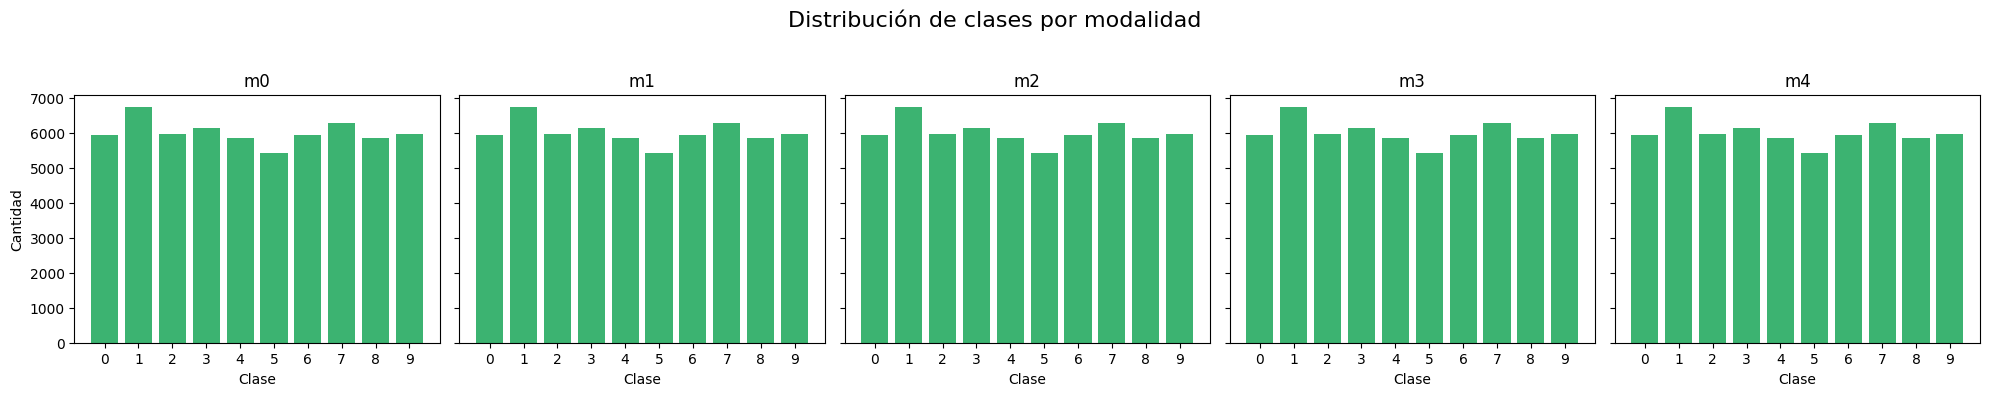

In [12]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
fig.suptitle("Distribución de clases por modalidad", fontsize=16)

for i, mod in enumerate(modalities):
    mod_path = os.path.join(base_path, mod)
    labels = [f.split('.')[1] for f in os.listdir(mod_path) if f.endswith('.png')]
    counts = Counter(labels)
    etiquetas = sorted(counts.keys())
    frecuencias = [counts[k] for k in etiquetas]
    
    axs[i].bar(etiquetas, frecuencias, color='mediumseagreen')
    axs[i].set_title(mod)
    axs[i].set_xlabel('Clase')
    axs[i].set_xticks(range(10))
    if i == 0:
        axs[i].set_ylabel('Cantidad')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



### Reporte del Análisis

El dataset **PolyMNIST** forma parte del conjunto "MNIST Multiple Dataset Comprehensive Analysis" y tiene como objetivo el reconocimiento de caracteres manuscritos en condiciones visuales variadas. Contiene **cinco modalidades visuales diferentes (`m0` a `m4`)** que comparten el mismo dígito pero con diferentes tipos de fondo y estilo.

Cada modalidad representa una forma distinta de alterar o distorsionar visualmente los dígitos, lo cual hace que el problema sea más desafiante y adecuado para probar modelos robustos de deep learning.

---

### Ejemplos de Modalidades

Se visualizaron ejemplos de cada modalidad (`m0`, `m1`, `m2`, `m3`, `m4`). A continuación se resumen sus características visuales:

- **m0**: dígitos oscuros sobre fondo claro y limpio.
- **m1**: dígitos claros sobre fondo natural desenfocado.
- **m2**: fondo con textura piel/rosado, dígitos oscuros.
- **m3**: fondo muy colorido y caótico, alta dificultad visual.
- **m4**: fondos estructurados (puertas, objetos), más difícil segmentar.

---

### Estructura del Dataset

El dataset se encuentra organizado de la siguiente forma:
```
PolyMNIST/
└── MMNIST/
├── train/
│ ├── m0/
│ ├── m1/
│ ├── m2/
│ ├── m3/
│ └── m4/
└── test/
├── m0/
├── m1/
├── m2/
├── m3/
└── m4/
```

Cada modalidad contiene imágenes con nombres como `123.4.png`, donde `4` representa la **etiqueta del dígito (clase)**.

---

### Resolución de Imágenes

Todas las imágenes tienen resolución:
(28, 28) píxeles.


### Distribución de Clases

A partir del nombre de los archivos (`id.clase.png`), se extrajeron las etiquetas para estimar la distribución:

El resultado muestra que las clases (0 al 9) están aproximadamente balanceadas. Cada clase tiene una cantidad muy similar de ejemplos por modalidad.

---

### Tamaño del Dataset

- Modalidades: 5 (`m0`, `m1`, `m2`, `m3`, `m4`)
- División: `train` y `test`
- Aproximadamente 12,000 imágenes por modalidad en total
- Esto da un estimado de 60,000 imágenes en total
  



